# Cài đặt môi trường

In [36]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
# Import thư viện
from sklearn import linear_model
import pandas as pd
import numpy as np
import math
import skfuzzy as fz
import numpy as np
from skfuzzy import control as ctrl
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Trích xuất dữ liệu

In [38]:
# Lấy dữ liệu dạng Dataframe của sheet GDP từ file dữ liệu 
DATASET_Covid = pd.read_csv('https://raw.githubusercontent.com/phatjkk/DeTai-NKKH/main/covid_19_data.csv')
DATASET_Covid_Vietnam = DATASET_Covid[DATASET_Covid['Quốc gia/vùng'] == 'Vietnam']

SoNguoiBiNhiemVietNam = DATASET_Covid_Vietnam['Số người bị nhiễm']
SoNguoiTuVongVietNam = DATASET_Covid_Vietnam['Tử vong']
SoNguoiAmTinhVietNam = DATASET_Covid_Vietnam['Âm tính']

SoNguoiNhiem14NgayGanNhat = SoNguoiBiNhiemVietNam.iloc[-14:]
SoNguoiTuVong14NgayGanNhat = SoNguoiTuVongVietNam.iloc[-14:]
SoNguoiAmTinh14NgayGanNhat = SoNguoiAmTinhVietNam.iloc[-14:]

SoNguoiNhiem14Ngay = SoNguoiNhiem14NgayGanNhat - SoNguoiTuVong14NgayGanNhat - SoNguoiAmTinh14NgayGanNhat

In [39]:
# Xem cấu trúc dữ liệu
DATASET_Covid

,STT,Ngày ghi nhận,Tiểu ban/tỉnh,Quốc gia/vùng,Thời gian ghi nhận cuối cùng,Số người bị nhiễm,Tử vong,Âm tính
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
306424,306425,5/29/2021,Zaporizhia Oblast,Ukraine,5/30/2021 4:20,102641,2335,95289
306425,306426,5/29/2021,Zeeland,Netherlands,5/30/2021 4:20,29147,245,0
306426,306427,5/29/2021,Zhejiang,Mainland China,5/30/2021 4:20,1364,1,1324
306427,306428,5/29/2021,Zhytomyr Oblast,Ukraine,5/30/2021 4:20,87550,1738,83790


# Trực quan hoá dữ liệu

Text(0.5, 1.0, 'Biểu đồ đường thể hiện độ tương quan giữa Bị nhiễm, Tử Vong và Âm tính')

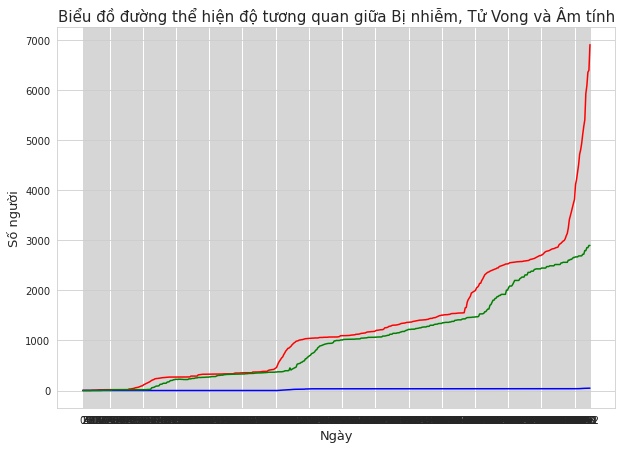

In [40]:
import numpy as np
import matplotlib.pyplot as plt

Ngay = list(map(str, range(len(SoNguoiAmTinhVietNam))))

fig = plt.subplots(figsize =(10, 7))
plt.plot(Ngay, SoNguoiBiNhiemVietNam, color='red', marker='')
plt.plot(Ngay, SoNguoiTuVongVietNam, color='blue', marker='')
plt.plot(Ngay, SoNguoiAmTinhVietNam, color='green', marker='')
plt.ylabel('Số người', fontsize = '13')
plt.xlabel('Ngày', fontsize = '13')
plt.title('Biểu đồ đường thể hiện độ tương quan giữa Bị nhiễm, Tử Vong và Âm tính', fontsize = '15')

# Phân tích mức độ lây lan

In [41]:
# Xây dựng 4 không gian nền tương ứng
XC = np.arange(1,100001)
XD = np.arange(1,10001)
XB = [1,2,3]
XS = np.arange(1,11)

In [42]:
# Định nghĩa tiền đề và kết luận dựa trên các biến ngôn ngữ
C = ctrl.Antecedent( XC,"Cases" )
D = ctrl.Antecedent( XD,"Deaths" )
B = ctrl.Antecedent( XB,"Border" )
S = ctrl.Consequent( XS,"Spread" )

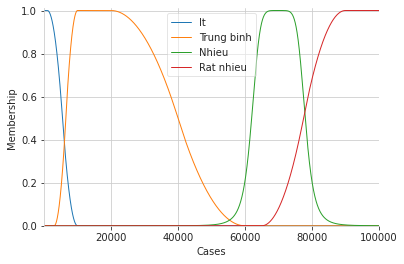

In [43]:
C["It"] = fz.zmf( C.universe,1000,10000 )
C["Trung binh"] = fz.pimf( C.universe,3000,10000,20000,60000 )
C["Nhieu"] = fz.gbellmf( C.universe,8000,3,70000 )
C["Rat nhieu"] = fz.smf( C.universe,65000,90000 )
C.view()

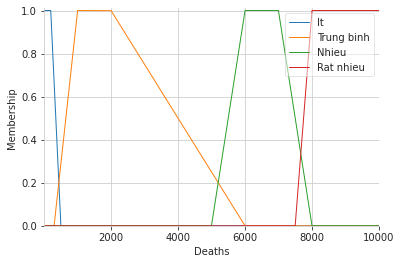

In [44]:
D["It"] = fz.trapmf( D.universe,[1,1,200,500] )
D["Trung binh"] = fz.trapmf( D.universe,[300,1000,2000,6000] )
D["Nhieu"] = fz.trapmf( D.universe,[5000,6000,7000,8000] )
D["Rat nhieu"] = fz.trapmf( D.universe,[7500,8000,10000,10000] )
D.view()

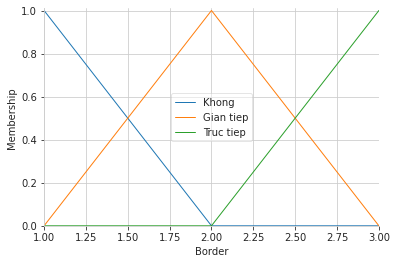

In [45]:
B["Khong"] = fz.trimf( B.universe,[1,1,2] )
B["Gian tiep"] = fz.trimf( B.universe,[1,2,3] )
B["Truc tiep"] = fz.trimf( B.universe,[2,3,3] )
B.view()

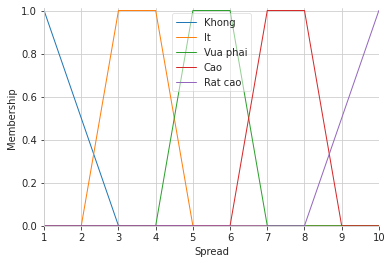

In [46]:
S["Khong"] = fz.trimf( S.universe,[1,1,3] )
S["It"] = fz.trapmf( S.universe,[2,3,4,5] )
S["Vua phai"] = fz.trapmf( S.universe,[4,5,6,7] )
S["Cao"] = fz.trapmf( S.universe,[6,7,8,9] )
S["Rat cao"] = fz.trimf( S.universe,[8,10,10] )
S.view()

In [47]:
R1 = ctrl.Rule( C["It"] & D["It"] & (B["Khong"]), S["Khong"] )
R2 = ctrl.Rule( C["It"] & D["It"] & (B["Gian tiep"]), S["It"] )
R3 = ctrl.Rule( C["It"] & D["It"] & (B["Truc tiep"]), S["Khong"] )
R4 = ctrl.Rule( C["It"] & D["Trung binh"] & (B["Khong"]), S["Khong"] )
R5_6 = ctrl.Rule( C["It"] & D["Trung binh"] & (B["Gian tiep"] | B["Truc tiep"]), S["It"] )
R7_8_9 = ctrl.Rule( C["It"] & D["Nhieu"] & (B["Khong"] | B["Gian tiep"] | B["Truc tiep"]), S["Vua phai"] )
R10_11_12 = ctrl.Rule( C["It"] & D["Rat nhieu"] & (B["Khong"]|B["Gian tiep"]|B["Truc tiep"]), S["Vua phai"])
R13 = ctrl.Rule( C["Trung binh"] & D["It"] & (B["Khong"]), S["Khong"] )
R14_15 = ctrl.Rule( C["Trung binh"] & D["It"] & (B["Gian tiep"] | B["Truc tiep"]), S["It"] )
R16 = ctrl.Rule( C["Trung binh"] & D["Trung binh"] & (B["Khong"]), S["It"] )
R17_18 = ctrl.Rule( C["Trung binh"] & D["Trung binh"] & (B["Gian tiep"] | B["Truc tiep"]), S["Vua phai"] )
R19 = ctrl.Rule( C["Trung binh"] & D["Nhieu"] & (B["Khong"]), S["Vua phai"] )
R20 = ctrl.Rule( C["Trung binh"] & D["Nhieu"] & (B["Gian tiep"]), S["Cao"] )
R21 = ctrl.Rule( C["Trung binh"] & D["Nhieu"] & (B["Truc tiep"]), S["It"] )

R22 = ctrl.Rule( C["Trung binh"] & D["Rat nhieu"] & (B["Khong"]), S["Vua phai"] )
R23 = ctrl.Rule( C["Trung binh"] & D["Rat nhieu"] & (B["Gian tiep"]), S["Cao"] )
R24 = ctrl.Rule( C["Trung binh"] & D["Rat nhieu"] & (B["Truc tiep"]), S["Vua phai"] )
R25_26 = ctrl.Rule( C["Nhieu"] & D["It"] & (B["Khong"] | B["Gian tiep"]), S["Vua phai"] )
R27 = ctrl.Rule( C["Nhieu"] & D["It"] & (B["Truc tiep"]), S["It"] )
R28 = ctrl.Rule( C["Nhieu"] & D["Trung binh"] & (B["Khong"]), S["Vua phai"] )
R29 = ctrl.Rule( C["Nhieu"] & D["Trung binh"] & (B["Gian tiep"]), S["Cao"] )
R30 = ctrl.Rule( C["Nhieu"] & D["Trung binh"] & (B["Truc tiep"]), S["It"] )
R31 = ctrl.Rule( C["Nhieu"] & D["Nhieu"] & (B["Khong"]), S["It"] )
R32 = ctrl.Rule( C["Nhieu"] & D["Nhieu"] & (B["Gian tiep"]), S["Cao"] )
R33 = ctrl.Rule( C["Nhieu"] & D["Nhieu"] & (B["Truc tiep"]), S["Vua phai"] )
R34 = ctrl.Rule( C["Nhieu"] & D["Rat nhieu"] & (B["Khong"]), S["Cao"] )
R35 = ctrl.Rule( C["Nhieu"] & D["Rat nhieu"] & (B["Gian tiep"]), S["Rat cao"] )
R36 = ctrl.Rule( C["Nhieu"] & D["Rat nhieu"] & (B["Truc tiep"]), S["Cao"] )
R37_38_39 = ctrl.Rule( C["Rat nhieu"] & D["It"] & (B["Khong"] | B["Gian tiep"]|B["Truc tiep"]), S["Vua phai"])
R40 = ctrl.Rule( C["Rat nhieu"] & D["Trung binh"] & (B["Khong"]), S["Vua phai"] )
R41 = ctrl.Rule( C["Rat nhieu"] & D["Trung binh"] & (B["Gian tiep"]), S["Cao"] )
R42 = ctrl.Rule( C["Rat nhieu"] & D["Trung binh"] & (B["Truc tiep"]), S["Vua phai"] )
R43 = ctrl.Rule( C["Rat nhieu"] & D["Nhieu"] & (B["Khong"]), S["Cao"] )
R44 = ctrl.Rule( C["Rat nhieu"] & D["Nhieu"] & (B["Gian tiep"]), S["Rat cao"] )
R45 = ctrl.Rule( C["Rat nhieu"] & D["Nhieu"] & (B["Truc tiep"]), S["Cao"] )
R46 = ctrl.Rule( C["Rat nhieu"] & D["Rat nhieu"] & (B["Khong"]), S["Cao"] )
R47 = ctrl.Rule( C["Rat nhieu"] & D["Rat nhieu"] & (B["Gian tiep"]), S["Rat cao"] )
R48 = ctrl.Rule( C["Rat nhieu"] & D["Rat nhieu"] & (B["Truc tiep"]), S["Cao"] )

In [48]:
#set rules
rules = [R1,R2,R3,R4,R5_6,R7_8_9,R10_11_12,R13,R14_15,R16,
R17_18,R19,R20,R21,R22,R23,R24,R25_26,R27,R28,R29,R30,R31,R32,
R33,R34,R35,R36,R37_38_39,R40,R41,R42,R43,R44,R45,R46,R47,R48]

system = ctrl.ControlSystemSimulation( ctrl.ControlSystem(rules) )

In [49]:
#input data
# iC = int( input("Số người bị nhiễm: ") )
# iD = int( input("Tổng số tử vong: ") )
# iB = int( input("Mức độ tiếp giáp (1:không, 2:Gian Tiep, 3:Truc tiep): ") )
iC = int(np.sum(SoNguoiNhiem14Ngay.to_numpy()))
iD = int(np.sum(SoNguoiTuVong14NgayGanNhat.to_numpy()))
iB = 3
system.input["Cases"] = iC
system.input["Deaths"] = iD
system.input["Border"] = iB

Số người nhiễm 35828, tử vong 586; tiếp giáp cấp độ 3. Khả năng lây lan cấp độ 5


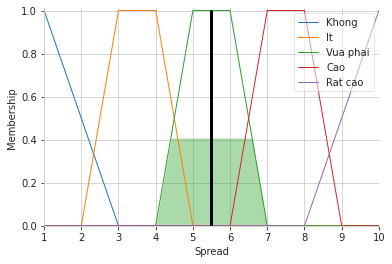

In [50]:
system.compute()
oS = system.output["Spread"]
S.view( system )
print("Số người nhiễm %d, tử vong %d; tiếp giáp cấp độ %d. Khả năng lây lan cấp độ %d" % (iC,iD,iB,oS))

In [51]:
# Chuyển kiểu dữ liệu Series -> numpy array
print(type(SoNguoiBiNhiemVietNam)) 
print(type(SoNguoiTuVongVietNam))
print(type(SoNguoiAmTinhVietNam))
SoNguoiBiNhiemVietNam = SoNguoiBiNhiemVietNam.to_numpy()
SoNguoiTuVongVietNam = SoNguoiTuVongVietNam.to_numpy()
SoNguoiAmTinhVietNam = SoNguoiAmTinhVietNam.to_numpy()
print(type(SoNguoiBiNhiemVietNam)) 
print(type(SoNguoiTuVongVietNam))
print(type(SoNguoiAmTinhVietNam))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Dự đoán số người nhiễm bệnh Việt Nam

In [52]:
# Dự đoán số người nhiễm bệnh Việt Nam
# Phân lớp dữ liệu ra làm 2 phần X, Y
X = []
Y = []
SoNguoiBiNhiemVN = SoNguoiBiNhiemVietNam
# Phân lớp dữ liệu ra làm 2 phần X, Y
X,Y=[],[]
range_X = 5
for i in range(range_X,len(SoNguoiBiNhiemVN)):
    X.append(SoNguoiBiNhiemVN[i-range_X:i].tolist())
    Y.append(SoNguoiBiNhiemVN[i])

Y = np.array(Y).reshape(-1,1).tolist()

print(X)
print(Y)

from sklearn.model_selection import train_test_split
# Cắt tập dữ liệu ra làm 2 phần training(80%) và test(20%).
# shuffle=True để xáo trộn dữ liệu, tăng tính ngẫu nhiên cho mô hình
x_training, x_test, y_training, y_test = train_test_split(X,Y,test_size=0.20, 
                                                          random_state=0,
                                                          shuffle=True)


[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 6], [2, 2, 2, 6, 6], [2, 2, 6, 6, 8], [2, 6, 6, 8, 8], [6, 6, 8, 8, 8], [6, 8, 8, 8, 10], [8, 8, 8, 10, 10], [8, 8, 10, 10, 13], [8, 10, 10, 13, 13], [10, 10, 13, 13, 14], [10, 13, 13, 14, 15], [13, 13, 14, 15, 15], [13, 14, 15, 15, 16], [14, 15, 15, 16, 16], [15, 15, 16, 16, 16], [15, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 18], [16, 16, 16, 18, 30], [16, 16, 18, 30, 30], [16, 18, 30, 30, 31], [18, 30, 30, 31, 38], [30, 30, 31, 38, 39], [30, 31, 38, 39, 47], [31, 38, 39, 47, 53], [38

In [53]:
# Xây dựng mô hình dự đoán
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
model=Sequential()
model.add(LSTM(units=128,return_sequences=True,
                    activation='relu',
                    input_shape=(range_X,1)))
model.add(LSTM(units=64,activation='relu'))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))


model.summary()
model.compile(loss='mean_squared_error',optimizer='adam',metrics=["acc"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(x_training,y_training,epochs=150,batch_size=32,verbose=1)

Epoch 1/150
13/13 [==============================] - 3s 27ms/step - loss: 1986443.5000 - acc: 0.0000e+00
Epoch 2/150
13/13 [==============================] - 0s 29ms/step - loss: 433584.0312 - acc: 0.0000e+00
Epoch 3/150
13/13 [==============================] - 0s 26ms/step - loss: 252638.8438 - acc: 0.0000e+00
Epoch 4/150
13/13 [==============================] - 0s 27ms/step - loss: 165690.5312 - acc: 0.0000e+00
Epoch 5/150
13/13 [==============================] - 0s 26ms/step - loss: 195942.2812 - acc: 0.0000e+00
Epoch 6/150
13/13 [==============================] - 0s 26ms/step - loss: 174466.1875 - acc: 0.0000e+00
Epoch 7/150
13/13 [==============================] - 0s 27ms/step - loss: 166504.1719 - acc: 0.0000e+00
Epoch 8/150
13/13 [==============================] - 0s 26ms/step - loss: 148493.5781 - acc: 0.0000e+00
Epoch 9/150
13/13 [==============================] - 0s 27ms/step - loss: 118418.5000 - acc: 0.0000e+00
Epoch 10/150
13/13 [==============================] - 0s 25ms/s

13/13 [==============================] - 0s 3ms/step


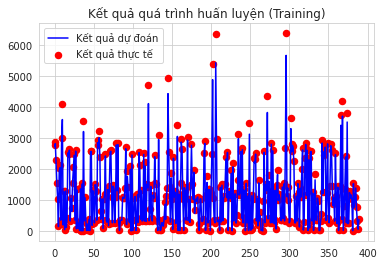

Mean Squared Error: 11685.465625529554
Root Mean Squared Error: 108.09933221592793
R2 Score: 0.990338159580601
4/4 [==============================] - 0s 5ms/step


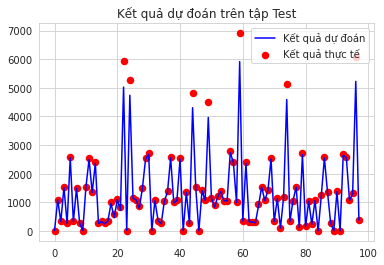

Mean Squared Error: 38123.00100597327
Root Mean Squared Error: 195.2511229314015
R2 Score: 0.980725331497389


In [55]:
# Phân tích độ chính xác mô hình
pred_y = model.predict(x_training)
x_ax=range(len(x_training))
plt.scatter(x_ax, y_training, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả quá trình huấn luyện (Training)")
plt.legend()
plt.show()

mse = mean_squared_error(y_training, pred_y)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2_score(y_training, pred_y))

# Dự đoán
pred_y_test = model.predict(x_test)
x_ax=range(len(x_test))
plt.scatter(x_ax, y_test, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả dự đoán trên tập Test")
plt.legend()
plt.show()

# Hiển thị sai số.
mse = mean_squared_error(y_test, pred_y_test)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2_score(y_test, pred_y_test))

1/1 [==============================] - 0s 42ms/step


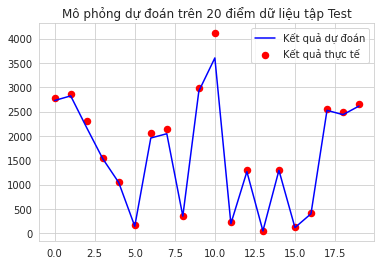

In [56]:
# Dự đoán trên 20 điểm dữ liệu ngẫu nhiên
maxPredict = 20
sampleDataX = x_training[:maxPredict]
sampleDataY = y_training[:maxPredict]


pred_y_test = model.predict(sampleDataX)
x_ax=range(len(sampleDataX))
plt.scatter(x_ax, sampleDataY, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Mô phỏng dự đoán trên 20 điểm dữ liệu tập Test")
plt.legend()
plt.show()


1/1 [==============================] - 0s 42ms/step


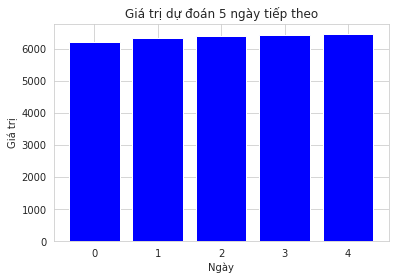

Giá trị dự đoán 5 ngày tiếp theo
[6223.4966 6327.07   6415.6353 6437.913  6456.89  ]


In [57]:
# Dự đoán 5 ngày tiếp theo
# Lấy giá trị gần đây nhất làm tham chiếu
giaTriGanNhat = SoNguoiBiNhiemVietNam[-(range_X):].tolist()
for i in range(range_X):
  giaTriDuDoan = model.predict([giaTriGanNhat])
  giaTriGanNhat.append(giaTriDuDoan[0][0])
  giaTriGanNhat.pop(0)

# Chuyển danh sách về dạng numpy array
danhSachGiaTriDuDoan = np.array(giaTriGanNhat).reshape(-1,1)

danhSachGiaTriDuDoan = danhSachGiaTriDuDoan.flatten()
x_ax=range(len(danhSachGiaTriDuDoan))

plt.bar(x_ax, danhSachGiaTriDuDoan,
        width = 0.8, color = 'blue')
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Giá trị dự đoán '+str(range_X)+' ngày tiếp theo')
plt.show()
print('Giá trị dự đoán '+str(range_X)+' ngày tiếp theo')
print(danhSachGiaTriDuDoan)

# Dự đoán số người tử vong vì Covid

In [58]:
# Dự đoán số người tử vong Việt Nam
# Phân lớp dữ liệu ra làm 2 phần X, Y
X = []
Y = []
SoNguoiTuVongVN = SoNguoiTuVongVietNam
# Phân lớp dữ liệu ra làm 2 phần X, Y
X,Y=[],[]
range_X = 5
for i in range(range_X,len(SoNguoiTuVongVN)):
    X.append(SoNguoiTuVongVN[i-range_X:i].tolist())
    Y.append(SoNguoiTuVongVN[i])

Y = np.array(Y).reshape(-1,1).tolist()

print(X)
print(Y)

from sklearn.model_selection import train_test_split
# Cắt tập dữ liệu ra làm 2 phần training(80%) và test(20%).
# shuffle=True để xáo trộn dữ liệu, tăng tính ngẫu nhiên cho mô hình
x_training, x_test, y_training, y_test = train_test_split(X,Y,test_size=0.20, 
                                                          random_state=0,
                                                          shuffle=True)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 

In [59]:
model=Sequential()
model.add(LSTM(units=128,return_sequences=True,
                    activation='relu',
                    input_shape=(range_X,1)))
model.add(LSTM(units=64,activation='relu'))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))


model.summary()
model.compile(loss='mean_squared_error',optimizer='adam',metrics=["acc"])
model.fit(x_training,y_training,epochs=150,batch_size=32,verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
13/13 [=============================

13/13 [==============================] - 0s 4ms/step


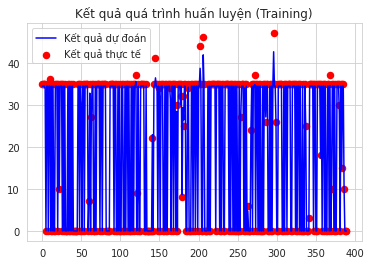

Mean Squared Error: 0.6029911351665279
Root Mean Squared Error: 0.7765250383384479
R2 Score: 0.9979188283952143
4/4 [==============================] - 0s 5ms/step


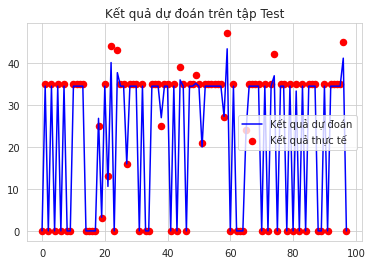

Mean Squared Error: 1.5022377655158106
Root Mean Squared Error: 1.225658094868145
R2 Score: 0.9946583601387313


In [60]:
# Phân tích độ chính xác mô hình
pred_y = model.predict(x_training)
x_ax=range(len(x_training))
plt.scatter(x_ax, y_training, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả quá trình huấn luyện (Training)")
plt.legend()
plt.show()

mse = mean_squared_error(y_training, pred_y)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2_score(y_training, pred_y))

# Dự đoán
pred_y_test = model.predict(x_test)
x_ax=range(len(x_test))
plt.scatter(x_ax, y_test, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả dự đoán trên tập Test")
plt.legend()
plt.show()

# Hiển thị sai số.
mse = mean_squared_error(y_test, pred_y_test)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2_score(y_test, pred_y_test))

1/1 [==============================] - 0s 37ms/step


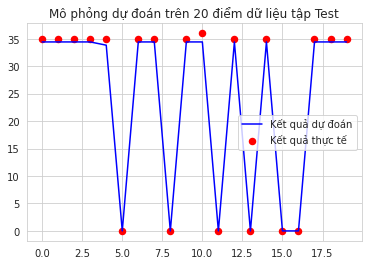

In [61]:
# Dự đoán trên 20 điểm dữ liệu ngẫu nhiên
maxPredict = 20
sampleDataX = x_training[:maxPredict]
sampleDataY = y_training[:maxPredict]


pred_y_test = model.predict(sampleDataX)
x_ax=range(len(sampleDataX))
plt.scatter(x_ax, sampleDataY, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Mô phỏng dự đoán trên 20 điểm dữ liệu tập Test")
plt.legend()
plt.show()


1/1 [==============================] - 0s 38ms/step


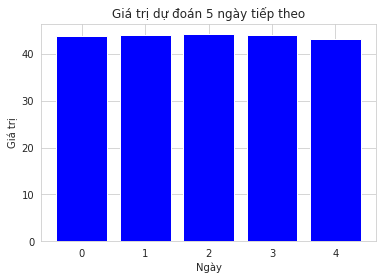

Giá trị dự đoán 5 ngày tiếp theo
[43.83953  44.104908 44.196552 43.936905 43.27034 ]


In [62]:
# Dự đoán 5 ngày tiếp theo
# Lấy giá trị gần đây nhất làm tham chiếu
giaTriGanNhat = SoNguoiTuVongVietNam[-(range_X):].tolist()
for i in range(range_X):
  giaTriDuDoan = model.predict([giaTriGanNhat])
  giaTriGanNhat.append(giaTriDuDoan[0][0])
  giaTriGanNhat.pop(0)

# Chuyển danh sách về dạng numpy array
danhSachGiaTriDuDoan = np.array(giaTriGanNhat).reshape(-1,1)

danhSachGiaTriDuDoan = danhSachGiaTriDuDoan.flatten()
x_ax=range(len(danhSachGiaTriDuDoan))

plt.bar(x_ax, danhSachGiaTriDuDoan,
        width = 0.8, color = 'blue')
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Giá trị dự đoán '+str(range_X)+' ngày tiếp theo')
plt.show()
print('Giá trị dự đoán '+str(range_X)+' ngày tiếp theo')
print(danhSachGiaTriDuDoan)

# Dự đoán số người Âm tính Việt Nam

In [63]:
# Dự đoán số người âm tính Việt Nam
# Phân lớp dữ liệu ra làm 2 phần X, Y
X = []
Y = []
SoNguoiAmTinhVN = SoNguoiAmTinhVietNam
# Phân lớp dữ liệu ra làm 2 phần X, Y
X,Y=[],[]
range_X = 5
for i in range(range_X,len(SoNguoiAmTinhVN)):
    X.append(SoNguoiAmTinhVN[i-range_X:i].tolist())
    Y.append(SoNguoiAmTinhVN[i])

Y = np.array(Y).reshape(-1,1).tolist()

print(X)
print(Y)

from sklearn.model_selection import train_test_split
# Cắt tập dữ liệu ra làm 2 phần training(80%) và test(20%).
# shuffle=True để xáo trộn dữ liệu, tăng tính ngẫu nhiên cho mô hình
x_training, x_test, y_training, y_test = train_test_split(X,Y,test_size=0.20, 
                                                          random_state=0,
                                                          shuffle=True)


[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 1], [0, 0, 1, 1, 1], [0, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 6], [1, 1, 1, 6, 6], [1, 1, 6, 6, 7], [1, 6, 6, 7, 7], [6, 6, 7, 7, 7], [6, 7, 7, 7, 7], [7, 7, 7, 7, 7], [7, 7, 7, 7, 7], [7, 7, 7, 7, 7], [7, 7, 7, 7, 7], [7, 7, 7, 7, 14], [7, 7, 7, 14, 14], [7, 7, 14, 14, 14], [7, 14, 14, 14, 14], [14, 14, 14, 14, 16], [14, 14, 14, 16, 16], [14, 14, 16, 16, 16], [14, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16, 16, 16], [16, 16, 16,

In [64]:
# Xây dựng mô hình dự đoán
model=Sequential()
model.add(LSTM(units=128,return_sequences=True,
                    activation='relu',
                    input_shape=(range_X,1)))
model.add(LSTM(units=64,activation='relu'))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))


model.summary()
model.compile(loss='mean_squared_error',optimizer='adam',metrics=["acc"])
model.fit(x_training,y_training,epochs=150,batch_size=32,verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
13/13 [=============================

13/13 [==============================] - 0s 4ms/step


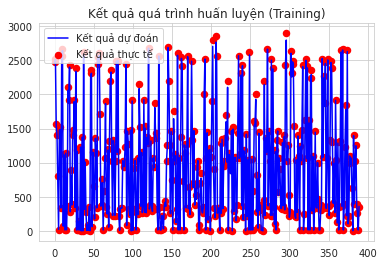

Mean Squared Error: 668.7145502280192
Root Mean Squared Error: 25.859515661125968
R2 Score: 0.9990301239052903
4/4 [==============================] - 0s 5ms/step


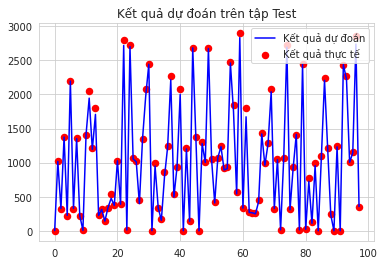

Mean Squared Error: 1296.0328745295876
Root Mean Squared Error: 36.000456587793266
R2 Score: 0.9981764747476285


In [65]:
# Phân tích độ chính xác mô hình
pred_y = model.predict(x_training)
x_ax=range(len(x_training))
plt.scatter(x_ax, y_training, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả quá trình huấn luyện (Training)")
plt.legend()
plt.show()

mse = mean_squared_error(y_training, pred_y)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2_score(y_training, pred_y))

# Dự đoán
pred_y_test = model.predict(x_test)
x_ax=range(len(x_test))
plt.scatter(x_ax, y_test, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả dự đoán trên tập Test")
plt.legend()
plt.show()

# Hiển thị sai số.
mse = mean_squared_error(y_test, pred_y_test)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2_score(y_test, pred_y_test))

1/1 [==============================] - 0s 36ms/step


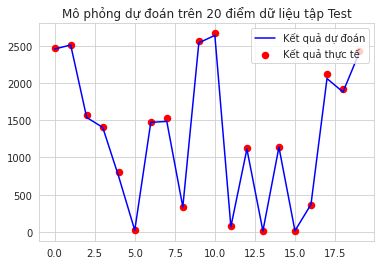

In [66]:
# Dự đoán trên 20 điểm dữ liệu ngẫu nhiên
maxPredict = 20
sampleDataX = x_training[:maxPredict]
sampleDataY = y_training[:maxPredict]


pred_y_test = model.predict(sampleDataX)
x_ax=range(len(sampleDataX))
plt.scatter(x_ax, sampleDataY, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Mô phỏng dự đoán trên 20 điểm dữ liệu tập Test")
plt.legend()
plt.show()

1/1 [==============================] - 0s 35ms/step


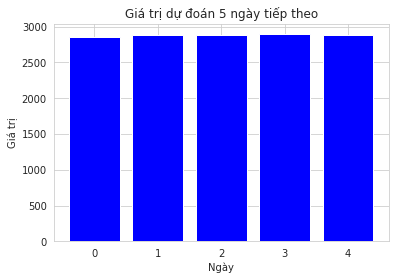

Giá trị dự đoán 5 ngày tiếp theo
[2855.4773 2877.6445 2887.4116 2894.9463 2889.0032]


In [67]:
# Dự đoán 5 ngày tiếp theo
# Lấy giá trị gần đây nhất làm tham chiếu
giaTriGanNhat = SoNguoiAmTinhVietNam[-(range_X):].tolist()
for i in range(range_X):
  giaTriDuDoan = model.predict([giaTriGanNhat])
  giaTriGanNhat.append(giaTriDuDoan[0][0])
  giaTriGanNhat.pop(0)

# Chuyển danh sách về dạng numpy array
danhSachGiaTriDuDoan = np.array(giaTriGanNhat).reshape(-1,1)

danhSachGiaTriDuDoan = danhSachGiaTriDuDoan.flatten()
x_ax=range(len(danhSachGiaTriDuDoan))

plt.bar(x_ax, danhSachGiaTriDuDoan,
        width = 0.8, color = 'blue')
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Giá trị dự đoán '+str(range_X)+' ngày tiếp theo')
plt.show()
print('Giá trị dự đoán '+str(range_X)+' ngày tiếp theo')
print(danhSachGiaTriDuDoan)